# Non-active Layer Transfer Matrix Method: Intensity spectrum

In [1]:
from TMM import * 

## Cavity properties

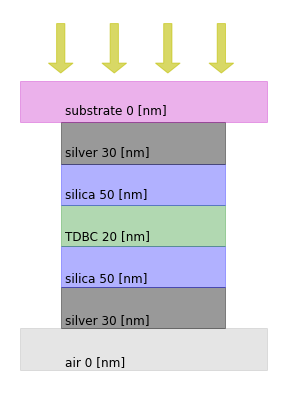

In [2]:
Cavity = [{'name':'substrate','thickness':0},
          {'name':'silver','thickness':30},
          {'name':'silica','thickness':50},
          {'name':'TDBC','thickness':20},
          {'name':'silica','thickness':50},
          {'name':'silver','thickness':30},
          {'name':'air','thickness':0}]

DrawCavity(Cavity,figsize=(7,7))

## Parameters Setup

In [3]:
x = 200
y = 200
min_wavelength = 388
max_wavelength = 827
wavelengths = np.linspace(min_wavelength,max_wavelength,y)
incidenceAngles = (np.pi/180)*np.linspace(0,90,x)

R = np.zeros((x,y))
T = np.zeros((x,y))
A = np.zeros((x,y))

## Transfer Matrix Method

In [4]:
for i,incidenceAngle in enumerate(incidenceAngles):
    for j,wavelength in enumerate(wavelengths):

        # Refractive index
        N = refractiveIndices(Cavity,wavelength)

        # Angles
        Theta = angles(N,incidenceAngle)

        # Phases
        Delta = phases(Cavity,N,Theta,wavelength)

        # Admittances
        Eta, EtaIn, pol = admittances(N,Theta,polarization='TM')

        # Cavity Matrix
        M_ensemble, Matrices = TMatrixGenerator(Delta,Eta)

        # RTA
        R[i,j], T[i,j], A[i,j] = RTA(M_ensemble,EtaIn,Eta[-1])

rta = {'R':R,'T':T,'A':A}

## Visualization

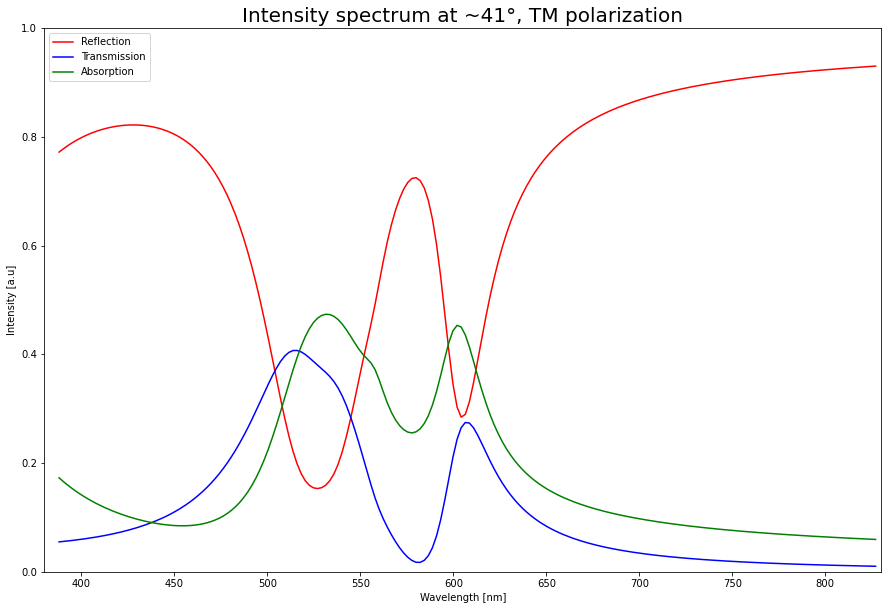

In [6]:
plotRTA(wavelengths,rta,icdAngle=41,toPlot='RTA', polarization = pol, figsize=(15,10),scaleFixed=True)